<table>
    <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="..\images\qworld.jpg" width="70%" align="left"></a></td>
        <td style="background-color:#ffffff;" width="*"></td>
        <td  style="background-color:#ffffff;vertical-align:text-top;"><a href="https://qsoftware.lu.lv" target="_blank"><img src="..\images\logo.jpg" width="25%" align="right"></a></td>        
    </tr>
    <tr><td colspan="3" align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a>
    </td></tr>
    <tr><td colspan="3" align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2>Quantum Tomography</h2>

We start with initializing a qubit with an arbitrary state by using a rotation.

<h3> Initialize a qubit with an arbitrary state </h3>



We can specify a (real-valued) quantum state by its angle ranged from 0 to $ 2\pi $ radian.

If $ \theta $ is our angle, then our quantum state is $ \ket{v} = \myvector{\cos \theta \\ \sin \theta} $.

<b> How can we set a qubit to an arbitrary quantum state when started in state $ \ket{0} $?</b>

We can use a rotation operator. Rotations preserve the lengths of vectors, and so they are quantum operators.

In qiskit, ry-gate can be used for rotation in 2-dimensional real-valued plane.

<a id="remark"></a>
<h3> Technical remark</h3>
    
Even though, we focus on only real-valued quantum systems in this tutorial, the quantum state of a qubit is represented by 2-dimensional complex-valued vector in general. To visually represent a complex number, we use two dimensions. So, to visually represent the state of a qubit, we use four dimensions. 
    
On the other hand, we can still visualize any state of a qubit by using certain mapping from four dimensions to three dimensions. This representation is called as <i>Bloch sphere</i>. 

The rotation operators over a single (complex-valued) qubit are defined on Bloch sphere. The names of gates "x", "y", or "z" refer to the axes on Bloch sphere. When we focus on real-valued qubit, then we should be careful about the parameter(s) that a gate takes. 

<i>In qiskit, ry-gate makes a rotation around $y$-axis with the given angle, say $\theta$, on Bloch sphere. This refers to a rotation in our real-valued $\ket{0}$-$\ket{1}$ plane with angle $ \frac{\theta}{2} $. Therefore, <b>we should provide the twice of the desired angle in this tutorial.</b></i>

<h3> Rotations with ry-gate </h3>

The ry-gate is used for rotation in 2-dimensional real-valued plane.

If our angle is $ \theta $ radians, then we pass $ 2 \theta $ radians as the parameter to ry-gate.

Then ry-gate implements the rotation with angle $\theta$. 

The default direction of a rotation by ry-gate is counterclockwise.

    mycircuit.ry(2*angle_of_rotation,quantum_register)

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
mycircuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# angle of rotation in radian
rotation_angle = 2*pi/3

# rotate the qubit with rotation_angle
mycircuit1.ry(2*rotation_angle,qreg1[0]) 

# measure the qubit
mycircuit1.measure(qreg1,creg1)

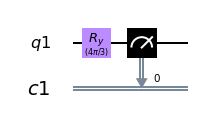

In [3]:
# draw the circuit
mycircuit1.draw(output='mpl')

In [4]:
# execute the program 1000 times
job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(mycircuit1)
print(counts) # counts is a dictionary

{'1': 742, '0': 258}


In [5]:
from math import sin,cos

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

The expected value of observing '0' is 250.0
The expected value of observing '1' is 750.0


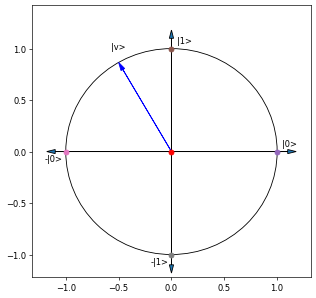

In [6]:
# draw the quantum state

%run qlatvia.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

<h3> Task 1 </h3>

You are given 1000 copies of an arbitrary quantum state which lies in the first or second quadrant of the unit circle.

This quantum state can be represented by an angle $ \theta \in [0,180) $.

<i>Please execute the following cell, but do not check the value of $\theta$.</i>

In [133]:
from random import randrange
from math import pi
 
theta = randrange(18000)/18000 * pi

Your task is to guess this quantum state by writing quantum programs.

We assume that the quantum state is given to us with the following code. 

    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

    # we define a quantum circuit with one qubit and one bit
    qreg2 =  QuantumRegister(1) # quantum register with a single qubit
    creg2 = ClassicalRegister(1) # classical register with a single bit
    circuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers

    # rotate the qubit with rotation_angle
    circuit2.ry(2*theta,qreg2[0])

You should write further codes without using variable $theta$ again.

You may use measurements or further $ry$-gates.

You can use 1000 shots in total when executing your quantum programs (you can have more than one program starting with the above code).

After your guess, please check the actual value and calculate your error in percentage.

In [156]:
# program 1

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from cmath import pi, acos, asin

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
circuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
circuit1.ry(2*theta,qreg1[0]) 
circuit1.measure(qreg1,creg1)
# execute the program 1000 times
n = 300
job = execute(circuit1,Aer.get_backend('qasm_simulator'),shots=n)
counts = job.result().get_counts(circuit1)
# print the results
class Prob:
    def __init__(self,state, prob):
        self.state = state
        self.prob = prob
    def __str__(self):
        return "state: %s, prob: %s " % (self.state,self.prob)
        

print(counts)
if counts['1'] > counts['0']:
    prob = Prob(1, asin(counts['1']/n))
else:
    prob = Prob(0, acos(counts['0']/n))
print(prob) 

def get_angle_from_prob(prob: Prob):
    return asin(prob.prob**(0.5)) if prob.state else acos(prob.prob**(0.5))
print(get_angle_from_prob(prob))
print(theta)

{'1': 199, '0': 101}
state: 1, prob: (0.725264414170526+0j) 
(1.0190769641552893+0j)
2.1343631422638656


In [135]:
# program 2

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from cmath import pi, asin, acos

# we define a quantum circuit with one qubit and one bit
qreg2 =  QuantumRegister(1) # quantum register with a single qubit
creg2 = ClassicalRegister(1) # classical register with a single bit
circuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers
n= 500
# rotate the qubit with rotation_angle
circuit2.ry(pi-2*theta,qreg2[0]) 
job = execute(circuit1,Aer.get_backend('qasm_simulator'),shots=n)
counts = job.result().get_counts(circuit1)
# print the results
class Prob:
    def __init__(self,state, prob):
        self.state = state
        self.prob = prob
    def __str__(self):
        return "state: %s, prob: %s " % (self.state,self.prob)
        

print(counts)
if counts['1'] > counts['0']:
    prob = Prob(1, asin(counts['1']/n))
else:
    prob = Prob(0, acos(counts['0']/n))
print(prob) 

def get_angle_from_prob(prob: Prob):
    return asin(prob.prob**(0.5)) if prob.state else acos(prob.prob**(0.5))
print(get_angle_from_prob(prob))
print(theta)

{'1': 353, '0': 147}
state: 1, prob: (0.7838341608469743+0j) 
(1.0872335739274837+0j)
2.1343631422638656


In [137]:
# program 3

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
qreg3 =  QuantumRegister(1) # quantum register with a single qubit
creg3 = ClassicalRegister(1) # classical register with a single bit
circuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
circuit3.ry(2*theta,qreg3[0]) 


<h3> Global phase </h3>

Suppose that we have a qubit and its state is either $ \ket{0} $ or $ -\ket{0} $.

Is there any sequence of one-qubit gates such that we can measuare different results after applying them?

All one-qubit gates are $ 2 \times 2 $ matrices, and their application is represented by a single matrix: $ A_n \cdot \cdots \cdot A_2 \cdot A_1 = A $.

By linearity, if $ A \ket{0} = \ket{u} $, then $ A - \ket{0} = -\ket{u} $. Thus, after measurement, the probabilities of observing state $ \ket{0} $ and state $ \ket{1} $ are the same. Therefore, we cannot distinguish them.

Even though the states $ \ket{0} $ and $ -\ket{0} $ are different mathematically, they are assumed the same from the physical point of view. 

The minus sign in front of $ -\ket{0} $ is also called as global phase.